# **Birth weight prediction**

---



## Load Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from joblib import dump, load

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

## Load The data

In [2]:
data = pd.read_csv('inputs/baby-weights-dataset2.csv')

In [3]:
data.columns

Index(['ID', 'SEX', 'MARITAL', 'FAGE', 'GAINED', 'VISITS', 'MAGE', 'FEDUC',
       'MEDUC', 'TOTALP', 'BDEAD', 'TERMS', 'LOUTCOME', 'WEEKS', 'RACEMOM',
       'RACEDAD', 'HISPMOM', 'HISPDAD', 'CIGNUM', 'DRINKNUM', 'ANEMIA',
       'CARDIAC', 'ACLUNG', 'DIABETES', 'HERPES', 'HYDRAM', 'HEMOGLOB',
       'HYPERCH', 'HYPERPR', 'ECLAMP', 'CERVIX', 'PINFANT', 'PRETERM', 'RENAL',
       'RHSEN', 'UTERINE', 'BWEIGHT'],
      dtype='object')

In [4]:
data.head()

,ID,SEX,MARITAL,FAGE,GAINED,VISITS,MAGE,FEDUC,MEDUC,TOTALP,...,HYPERCH,HYPERPR,ECLAMP,CERVIX,PINFANT,PRETERM,RENAL,RHSEN,UTERINE,BWEIGHT
0,2001,2,1,33,26,10,34,12,4,2,...,0,0,0,0,0,0,0,0,0,4.3750
1,2002,2,2,19,40,10,18,11,12,1,...,0,0,0,0,0,0,0,0,0,6.9375
2,2003,2,1,33,16,14,31,16,16,2,...,0,0,0,0,0,0,0,0,0,8.5000
3,2004,1,1,25,40,15,28,12,12,3,...,0,0,0,0,0,0,0,0,0,8.5000
4,2005,1,2,21,60,13,20,12,14,2,...,0,1,0,0,0,0,0,0,0,9.0000


### Dropping bias columns

In [5]:
columns = ['ID', 'MARITAL', 'FEDUC', 'MEDUC', 'HISPMOM', 'HISPDAD']
data.drop(columns, inplace=True, axis=1, errors='ignore')
data.columns

Index(['SEX', 'FAGE', 'GAINED', 'VISITS', 'MAGE', 'TOTALP', 'BDEAD', 'TERMS',
       'LOUTCOME', 'WEEKS', 'RACEMOM', 'RACEDAD', 'CIGNUM', 'DRINKNUM',
       'ANEMIA', 'CARDIAC', 'ACLUNG', 'DIABETES', 'HERPES', 'HYDRAM',
       'HEMOGLOB', 'HYPERCH', 'HYPERPR', 'ECLAMP', 'CERVIX', 'PINFANT',
       'PRETERM', 'RENAL', 'RHSEN', 'UTERINE', 'BWEIGHT'],
      dtype='object')

In [6]:
data.head()

,SEX,FAGE,GAINED,VISITS,MAGE,TOTALP,BDEAD,TERMS,LOUTCOME,WEEKS,...,HYPERCH,HYPERPR,ECLAMP,CERVIX,PINFANT,PRETERM,RENAL,RHSEN,UTERINE,BWEIGHT
0,2,33,26,10,34,2,0,0,1,35,...,0,0,0,0,0,0,0,0,0,4.3750
1,2,19,40,10,18,1,0,0,9,41,...,0,0,0,0,0,0,0,0,0,6.9375
2,2,33,16,14,31,2,0,0,1,39,...,0,0,0,0,0,0,0,0,0,8.5000
3,1,25,40,15,28,3,0,0,1,38,...,0,0,0,0,0,0,0,0,0,8.5000
4,1,21,60,13,20,2,0,0,1,40,...,0,1,0,0,0,0,0,0,0,9.0000


## Correlation Analysis

### Standardize the data

In [7]:
y = data[['BWEIGHT']]
sc_y = StandardScaler()
# fit and transform the data
y_std = sc_y.fit_transform(y)

In [8]:
y_std = pd.DataFrame(y_std, columns = y.columns)
y_std.head()

,BWEIGHT
0,-2.168609
1,-0.241126
2,0.934169
3,0.934169
4,1.310263


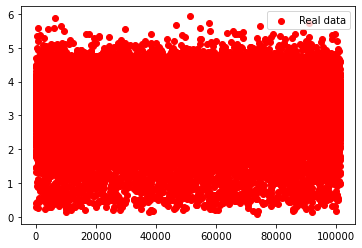

In [9]:
df = pd.DataFrame(sc_y.inverse_transform(y_std), columns=['y_std'])
#Pounds to kilograms
df['y_kg'] = df['y_std'].apply(lambda x: x * .454)

plt.scatter(df.index, df['y_kg'], color = 'red', label = 'Real data')
plt.legend()
plt.show()

In [10]:
X = data.drop(['BWEIGHT'], axis=1)
sc_X = StandardScaler()
# fit and transform the data
X_std = sc_X.fit_transform(X)

In [11]:
X_std = pd.DataFrame(X_std, columns = X.columns)
X_std.head()

,SEX,FAGE,GAINED,VISITS,MAGE,TOTALP,BDEAD,TERMS,LOUTCOME,WEEKS,...,HEMOGLOB,HYPERCH,HYPERPR,ECLAMP,CERVIX,PINFANT,PRETERM,RENAL,RHSEN,UTERINE
0,1.027946,0.417018,-0.314575,-0.653532,1.051424,-0.253956,-0.106854,-0.462832,-0.770996,-1.491207,...,-0.04146,-0.11815,-0.229511,-0.061816,-0.061251,-0.075584,-0.094526,-0.046842,-0.061575,-0.058768
1,1.027946,-1.649237,0.713678,-0.653532,-1.634339,-0.924978,-0.106854,-0.462832,1.386573,0.903940,...,-0.04146,-0.11815,-0.229511,-0.061816,-0.061251,-0.075584,-0.094526,-0.046842,-0.061575,-0.058768
2,1.027946,0.417018,-1.049041,0.419176,0.547843,-0.253956,-0.106854,-0.462832,-0.770996,0.105557,...,-0.04146,-0.11815,-0.229511,-0.061816,-0.061251,-0.075584,-0.094526,-0.046842,-0.061575,-0.058768
3,-0.970668,-0.763699,0.713678,0.687353,0.044263,0.417066,-0.106854,-0.462832,-0.770996,-0.293634,...,-0.04146,-0.11815,-0.229511,-0.061816,-0.061251,-0.075584,-0.094526,-0.046842,-0.061575,-0.058768
4,-0.970668,-1.354058,2.182610,0.150999,-1.298619,-0.253956,-0.106854,-0.462832,-0.770996,0.504748,...,-0.04146,-0.11815,4.357090,-0.061816,-0.061251,-0.075584,-0.094526,-0.046842,-0.061575,-0.058768


In [12]:
#To save scalers
os.makedirs('outputs', exist_ok=True)
dump(sc_X, './outputs/std_scaler_X.bin', compress=True)
dump(sc_y, './outputs/std_scaler_y.bin', compress=True)

['./outputs/std_scaler_y.bin']

In [13]:
corrMatrix = X_std.corr()
print (corrMatrix)

               SEX      FAGE    GAINED    VISITS      MAGE    TOTALP  \
SEX       1.000000 -0.001383 -0.029824  0.000475 -0.004593 -0.006945   
FAGE     -0.001383  1.000000 -0.055416  0.100619  0.750074  0.282043   
GAINED   -0.029824 -0.055416  1.000000  0.091973 -0.062252 -0.123318   
VISITS    0.000475  0.100619  0.091973  1.000000  0.138458 -0.058236   
MAGE     -0.004593  0.750074 -0.062252  0.138458  1.000000  0.348340   
TOTALP   -0.006945  0.282043 -0.123318 -0.058236  0.348340  1.000000   
BDEAD    -0.003890  0.040859 -0.015823 -0.000124  0.040497  0.166944   
TERMS    -0.006555  0.126696 -0.012694  0.032781  0.171695  0.651354   
LOUTCOME  0.004687 -0.255937  0.141953  0.050606 -0.303697 -0.631086   
WEEKS     0.018815 -0.038116  0.098017  0.136121 -0.053401 -0.082212   
RACEMOM   0.000686  0.051216 -0.029612 -0.015863  0.028325 -0.005291   
RACEDAD   0.003727  0.032006 -0.028377 -0.012669  0.007115  0.002045   
CIGNUM    0.001175 -0.037478 -0.011584 -0.056671 -0.077175  0.07

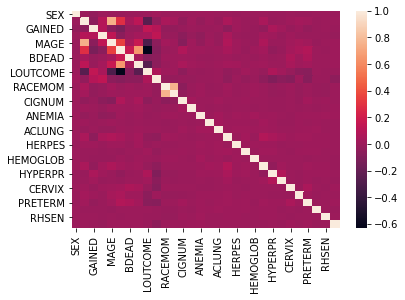

In [14]:
sn.heatmap(corrMatrix)
plt.show()

### Dropping high correlated features

In [15]:
corr_abs = corrMatrix.abs()
upper_tri = corr_abs.where(np.triu(np.ones(corr_abs.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.7)]
print(to_drop)

['MAGE', 'RACEDAD']


In [16]:
#data_std.drop(to_drop, inplace=True, axis=1, errors='ignore')
#data_std.columns

## Split the data

In [17]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_std, y_std, test_size=0.3, random_state=42)
X_test, X_validate, y_test, y_validate = train_test_split(X_test, y_test, test_size=0.5, random_state=42)


X_validate.to_json('./inputs/X_validation_data.json', orient="split")
y_validate.to_json('./inputs/y_validation_data.json', orient="split")

## Model Training

In [18]:
from azureml.core import Workspace

ws = Workspace.get(name='demo-aml',subscription_id='YOUR-SUSCRIPTION-ID',resource_group='demo-aml')

In [19]:
from azureml.core import Experiment

experiment_name = 'BABY-WEIGHT-EXP'
exp = Experiment(workspace=ws, name=experiment_name)

### Model1: Simple Regresion

In [20]:
run = exp.start_logging()

In [21]:
# define the model
model1 = LinearRegression()
# fit the model
model1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Features importance

In [22]:
features = pd.DataFrame(np.transpose(model1.coef_), index=X_train.columns, columns=['coefficient'])
features.sort_values(by='coefficient')

,coefficient
SEX,-0.100776
CIGNUM,-0.081634
HYPERPR,-0.058261
LOUTCOME,-0.055033
RACEDAD,-0.043628
TERMS,-0.040966
RACEMOM,-0.034825
HYDRAM,-0.031763
ECLAMP,-0.030900
PRETERM,-0.029105


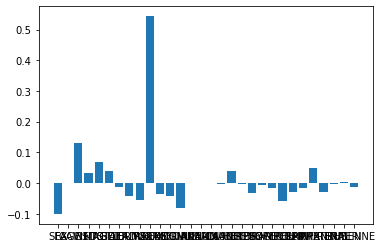

In [23]:
plt.bar(features.index, features.coefficient)
run.log_image(name='features_model1', plot=plt)
plt.show()

In [24]:
os.makedirs('tmp', exist_ok=True)
features.to_csv('./tmp/features_model1.txt',index=None)

#### Evaluation

In [25]:
yhat = model1.predict(X_test)
# evaluate predictions
mse = mean_squared_error(y_test, yhat)
mae = mean_absolute_error(y_test, yhat)
#map = mean_absolute_percentage_error(y_test, yhat)
r2 = r2_score(y_test, yhat)
print('MSE: %.3f' % mse)
run.log('MSE', mse)
print('MAE: %.3f' % mae)
run.log('MAE', mae)
print('R2: %.3f' % r2)
run.log('R2',r2)

MSE: 0.618
MAE: 0.614
R2: 0.390


In [26]:
df1 = pd.DataFrame(sc_y.inverse_transform(yhat), columns=['y_hat'])
df2 = pd.DataFrame(sc_y.inverse_transform(y_test), columns=['y_test'])
df = pd.concat([df1, df2], axis=1)
#Pounds to kilograms
df['y_hat_kg'] = df['y_hat'].apply(lambda x: x * .454)
df['y_test_kg'] = df['y_test'].apply(lambda x: x * .454)
df.head()

,y_hat,y_test,y_hat_kg,y_test_kg
0,7.522103,7.8750,3.415035,3.575250
1,7.639178,7.6250,3.468187,3.461750
2,5.962541,7.1875,2.706994,3.263125
3,6.433820,6.4375,2.920954,2.922625
4,7.364349,7.4375,3.343414,3.376625


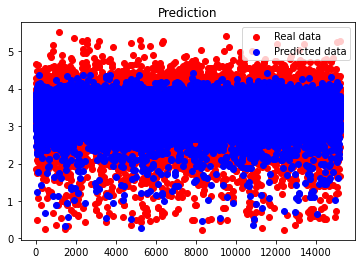

In [27]:
plt.scatter(df.index, df['y_test_kg'], color = 'red', label = 'Real data')
plt.scatter(df.index, df['y_hat_kg'], color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
run.log_image(name='prediction_model1', plot=plt)
plt.show()

In [28]:
#Save model
dump(value=model1, filename='./tmp/model1.pkl')

['./tmp/model1.pkl']

In [29]:
tags = { "Model": 'BABY-WEIGHT',
        "Type": 'Simple Linear Regresion',
        "User": 'alejandra.taborda-londono@capgemini.com'}
run.set_tags(tags)

In [30]:
run.complete()

### Model2: ElacticNet

In [31]:
run = exp.start_logging()

In [32]:
from sklearn.linear_model import ElasticNet
# define the model
model2 = ElasticNet(alpha=0.05)
# fit the model
model2.fit(X_train, y_train)

ElasticNet(alpha=0.05, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

#### Features importance

In [33]:
# get importance
intercept = model2.intercept_
features = pd.DataFrame(np.transpose(model2.coef_), index=X_train.columns, columns=['coefficient'])
features.sort_values(by='coefficient')

,coefficient
SEX,-0.074473
CIGNUM,-0.056366
LOUTCOME,-0.041040
HYPERPR,-0.035655
RACEDAD,-0.030151
RACEMOM,-0.019724
ECLAMP,-0.009709
HYDRAM,-0.008780
PRETERM,-0.006672
RENAL,-0.000000


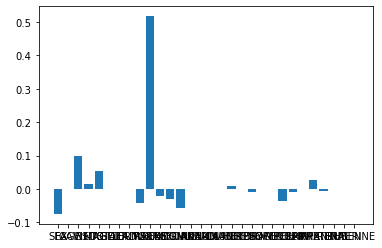

In [34]:
plt.bar(features.index, features.coefficient)
run.log_image(name='features_model2', plot=plt)
plt.show()

In [35]:
to_drop2 = features.index[features['coefficient'] == 0.0].tolist()
to_drop2

['FAGE',
 'TOTALP',
 'BDEAD',
 'TERMS',
 'DRINKNUM',
 'ANEMIA',
 'CARDIAC',
 'ACLUNG',
 'HERPES',
 'HEMOGLOB',
 'HYPERCH',
 'CERVIX',
 'RENAL',
 'RHSEN',
 'UTERINE']

In [36]:
features.to_csv('./tmp/features_model2.txt',index=None)

In [37]:
# evaluate the model
yhat = model2.predict(X_test)
# evaluate predictions
mse = mean_squared_error(y_test, yhat)
mae = mean_absolute_error(y_test, yhat)
#map = mean_absolute_percentage_error(y_test, yhat)
r2 = r2_score(y_test, yhat)
print('MSE: %.3f' % mse)
run.log('MSE', mse)
print('MAE: %.3f' % mae)
run.log('MAE', mae)
print('R2: %.3f' % r2)
run.log('R2',r2)

MSE: 0.633
MAE: 0.621
R2: 0.375


In [38]:
df1 = pd.DataFrame(sc_y.inverse_transform(yhat), columns=['y_hat'])
df2 = pd.DataFrame(sc_y.inverse_transform(y_test), columns=['y_test'])
df = pd.concat([df1, df2], axis=1)
#Pounds to kilograms
df['y_hat_kg'] = df['y_hat'].apply(lambda x: x * .454)
df['y_test_kg'] = df['y_test'].apply(lambda x: x * .454)
df.head()

,y_hat,y_test,y_hat_kg,y_test_kg
0,7.481452,7.8750,3.396579,3.575250
1,7.519333,7.6250,3.413777,3.461750
2,6.126524,7.1875,2.781442,3.263125
3,6.535858,6.4375,2.967280,2.922625
4,7.270176,7.4375,3.300660,3.376625


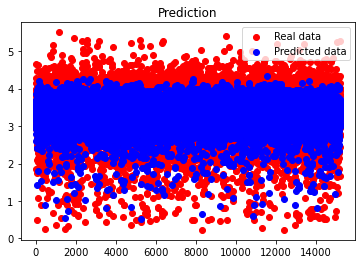

In [39]:
plt.scatter(df.index, df['y_test_kg'], color = 'red', label = 'Real data')
plt.scatter(df.index, df['y_hat_kg'], color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
run.log_image(name='prediction_model2', plot=plt)
plt.show()

In [40]:
#Save model
dump(value=model1, filename='./tmp/model2.pkl')

['./tmp/model2.pkl']

In [41]:
tags = { "Model": 'BABY-WEIGHT',
        "Type": 'Elasticnet',
        "User": 'alejandra.taborda-londono@capgemini.com'}
run.set_tags(tags)

In [42]:
run.complete()

### Model3: Feature Selection

In [43]:
run = exp.start_logging()

In [44]:
# feature selection
def select_features(X_train, y_train, X_test):
  # configure to select a subset of features
  #fs = SelectKBest(score_func=f_regression, k=10)
  fs = SelectKBest(score_func=mutual_info_regression, k=10)
  # learn relationship from training data
  fs.fit(X_train, y_train)
  # transform train input data
  X_train_fs = fs.transform(X_train)
  # transform test input data
  X_test_fs = fs.transform(X_test)
  return X_train_fs, X_test_fs, fs

In [45]:
%%time

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train.values.ravel(), X_test)
# fit the model
model3 = LinearRegression()
model3.fit(X_train_fs, y_train)

CPU times: user 1min 34s, sys: 3.32 s, total: 1min 37s
Wall time: 1min 37s


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
# 1st way to get the list
vector_names = list(X_train.columns[fs.get_support(indices=True)])
for i in vector_names:
  print(i)

SEX
FAGE
GAINED
VISITS
WEEKS
RACEMOM
RACEDAD
CIGNUM
ANEMIA
ACLUNG


#### Features importance

In [47]:
features = pd.DataFrame(np.transpose(model3.coef_), index=vector_names, columns=['coefficient'])
features.sort_values(by='coefficient')

,coefficient
SEX,-0.101421
CIGNUM,-0.081784
RACEDAD,-0.044345
RACEMOM,-0.036919
ACLUNG,-0.004689
ANEMIA,-0.002157
VISITS,0.030551
FAGE,0.073020
GAINED,0.111977
WEEKS,0.553754


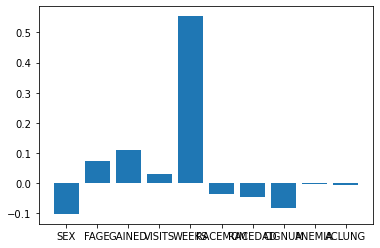

In [48]:
plt.bar(features.index, features.coefficient)
run.log_image(name='features_model3', plot=plt)
plt.show()

In [49]:
features.to_csv('./tmp/features_model3.txt',index=None)

#### Evaluation

In [50]:
yhat = model3.predict(X_test_fs)
# evaluate predictions
mse = mean_squared_error(y_test, yhat)
mae = mean_absolute_error(y_test, yhat)
r2 = r2_score(y_test, yhat)

print('MSE: %.3f' % mse)
run.log('MSE', mse)
print('MAE: %.3f' % mae)
run.log('MAE', mae)
print('R2: %.3f' % r2)
run.log('R2',r2)

MSE: 0.643
MAE: 0.626
R2: 0.365


In [51]:
df1 = pd.DataFrame(sc_y.inverse_transform(yhat), columns=['y_hat'])
df2 = pd.DataFrame(sc_y.inverse_transform(y_test), columns=['y_test'])
df = pd.concat([df1, df2], axis=1)
#Pounds to kilograms
df['y_hat_kg'] = df['y_hat'].apply(lambda x: x * .454)
df['y_test_kg'] = df['y_test'].apply(lambda x: x * .454)
df.head()

,y_hat,y_test,y_hat_kg,y_test_kg
0,7.615415,7.8750,3.457398,3.575250
1,7.427657,7.6250,3.372156,3.461750
2,6.377231,7.1875,2.895263,3.263125
3,6.589891,6.4375,2.991810,2.922625
4,7.227193,7.4375,3.281146,3.376625


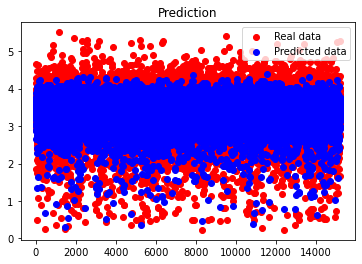

In [52]:
plt.scatter(df.index, df['y_test_kg'], color = 'red', label = 'Real data')
plt.scatter(df.index, df['y_hat_kg'], color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
run.log_image(name='prediction_model3', plot=plt)
plt.show()

In [53]:
#Save model
dump(value=model3, filename='./tmp/model3.pkl')

['./tmp/model3.pkl']

In [54]:
tags = { "Model": 'BABY-WEIGHT',
        "Type": 'Linear Regresion + feature selection',
        "User": 'alejandra.taborda-londono@capgemini.com'}
run.set_tags(tags)

In [55]:
run.complete()

### Model4: Neural Network

In [56]:
import os
os.environ['AUTOGRAPH_VERBOSITY'] = '1'

import tensorflow as tf
tf.autograph.set_verbosity(0)

In [57]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam

In [58]:
run = exp.start_logging()

In [ ]:
%%time

callback = EarlyStopping(monitor='loss', patience=3)
#opt = SGD(learning_rate=0.001)
opt = Adam(learning_rate=0.001)
input = X_train.shape[1]

# Initialising the ANN
model = Sequential()
# Adding the input layer and the first hidden layer
model.add(Dense(32, activation = 'relu', input_dim = input))
# Adding the second hidden layer
model.add(Dense(units = 32, activation = 'relu'))
# Adding the third hidden layer
model.add(Dense(units = 32, activation = 'relu'))
# Adding the output layer
model.add(Dense(units = 1))
# Compiling the ANN
model.compile(optimizer = opt, loss = 'mean_squared_error', metrics=["mean_absolute_error", "cosine_similarity"])

# Fitting the ANN to the Training set
model.fit(X_train, y_train, batch_size = 10, epochs = 100, callbacks=[callback])



Train on 70980 samples
Epoch 1/100
70980/70980 [==============================] - 12s 171us/sample - loss: 0.5854 - mean_absolute_error: 0.5944 - cosine_similarity: 0.3428
Epoch 2/100
70980/70980 [==============================] - 12s 162us/sample - loss: 0.5631 - mean_absolute_error: 0.5844 - cosine_similarity: 0.3541
Epoch 3/100
70980/70980 [==============================] - 12s 164us/sample - loss: 0.5584 - mean_absolute_error: 0.5819 - cosine_similarity: 0.3604
Epoch 4/100
70980/70980 [==============================] - 12s 162us/sample - loss: 0.5555 - mean_absolute_error: 0.5801 - cosine_similarity: 0.3610
Epoch 5/100
70980/70980 [==============================] - 12s 163us/sample - loss: 0.5535 - mean_absolute_error: 0.5795 - cosine_similarity: 0.3628
Epoch 6/100
70980/70980 [==============================] - 12s 163us/sample - loss: 0.5519 - mean_absolute_error: 0.5782 - cosine_similarity: 0.3646
Epoch 7/100
70980/70980 [==============================] - 12s 162us/sample - loss:

#### Evaluation

In [ ]:
yhat = model.predict(X_test)
df1 = pd.DataFrame(sc_y.inverse_transform(yhat), columns=['y_hat'])
df2 = pd.DataFrame(sc_y.inverse_transform(y_test), columns=['y_test'])
df = pd.concat([df1, df2], axis=1)
#Pounds to kilograms
df['y_hat_kg'] = df['y_hat'].apply(lambda x: x * .454)
df['y_test_kg'] = df['y_test'].apply(lambda x: x * .454)
df.head()

In [ ]:
plt.scatter(df.index, df['y_test_kg'], color = 'red', label = 'Real data')
plt.scatter(df.index, df['y_hat_kg'], color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
run.log_image(name='prediction_model', plot=plt)
plt.show()

In [ ]:
# evaluate predictions
mse = mean_squared_error(y_test, yhat)
mae = mean_absolute_error(y_test, yhat)
r2 = r2_score(y_test, yhat)
r2 = r2_score(y_test, yhat) 

print('MSE: %.3f' % mse)
run.log('MSE', mse)
print('MAE: %.3f' % mae)
run.log('MAE', mae)
print('R2: %.3f' % r2)
run.log('R2',r2)


In [ ]:
#Save model
model.save('./outputs/model.h5')  

In [ ]:
tags = { "Model": 'BABY-WEIGHT',
        "Type": 'Neural Network',
        "User": 'alejandra.taborda-londono@capgemini.com'}
run.set_tags(tags)
run.complete()

In [ ]:
### Model Registry

In [ ]:
model_name = 'BABY-WEIGHT'

run.register_model(model_name= model_name, 
                   model_path = './outputs/',
                   tags = tags,
                   description="Neural Network for Birth weight prediction")